In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import load_model

Prediction based picture uploaded
1/1 [==============================] - 2s 2s/step
Predicted Class: fried rice
Nutrition Values:
          name  protein  calcium   fat  carbohydrates  vitamins
44  fried rice     7.69    0.013  3.21          27.24    0.2419


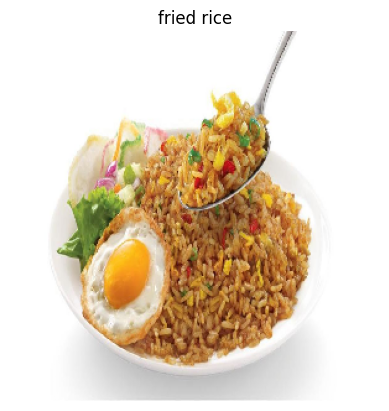

1/1 [==============================] - 0s 273ms/step
Predicted Class: chicken curry
Nutrition Values:
             name  protein  calcium   fat  carbohydrates  vitamins
18  chicken curry     5.73    0.032  3.85           6.67     0.263


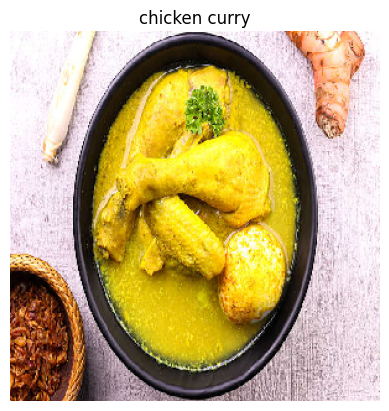

In [ ]:
def convert_class_name(name):
    converted_name = name.replace("_", " ")
    return converted_name

def create_foodlist(path):
    list_ = list()
    for root, dirs, files in os.walk(path, topdown=False):
        for name in dirs:
            list_.append(name)
    return list_

my_model = load_model('/content/drive/MyDrive/test/best_model.h5', compile=False)

csv_file_path = '/content/drive/MyDrive/test/nutrition101.csv'
label_data = pd.read_csv(csv_file_path)

food_list = [
    'apple pie', 'baby back ribs', 'baklava', 'beef carpaccio', 'beef tartare', 'beet salad', 'beignets', 'bibimbap',
    'bread pudding', 'breakfast burrito', 'bruschetta', 'caesar salad', 'cannoli', 'caprese salad', 'carrot cake',
    'ceviche', 'cheese plate', 'cheesecake', 'chicken curry', 'chicken quesadilla', 'chicken wings', 'chocolate cake',
    'chocolate mousse', 'churros', 'clam chowder', 'club sandwich', 'crab cakes', 'creme brulee', 'croque madame',
    'cup cakes', 'deviled eggs', 'donuts', 'dumplings', 'edamame', 'eggs benedict', 'escargots', 'falafel',
    'filet mignon', 'fish and_chips', 'foie gras', 'french fries', 'french onion soup', 'french toast',
    'fried calamari', 'fried rice', 'frozen yogurt', 'garlic bread', 'gnocchi', 'greek salad',
    'grilled cheese sandwich', 'grilled salmon', 'guacamole', 'gyoza', 'hamburger', 'hot and sour soup', 'hot dog',
    'huevos rancheros', 'hummus', 'ice cream', 'lasagna', 'lobster bisque', 'lobster roll sandwich',
    'macaroni and cheese', 'macarons', 'miso soup', 'mussels', 'nachos', 'omelette', 'onion rings', 'oysters',
    'pad thai', 'paella', 'pancakes', 'panna cotta', 'peking duck', 'pho', 'pizza', 'pork chop', 'poutine',
    'prime rib', 'pulled pork sandwich', 'ramen', 'ravioli', 'red velvet cake', 'risotto', 'samosa', 'sashimi',
    'scallops', 'seaweed salad', 'shrimp and grits', 'spaghetti bolognese', 'spaghetti carbonara', 'spring rolls',
    'steak', 'strawberry shortcake', 'sushi', 'tacos', 'octopus balls', 'tiramisu', 'tuna tartare', 'waffles'
]

def predict_class_with_nutrition(model, images, label_data, show=True):
    for img_path in images:
        img = image.load_img(img_path, target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img /= 255.

        pred = model.predict(img)
        index = np.argmax(pred)

        if 0 <= index < len(food_list):
            converted_class_name = convert_class_name(food_list[index])
            print(f"Predicted Class: {converted_class_name}")

            nutrition_values = label_data[label_data['name'] == converted_class_name]
            print("Nutrition Values:")
            print(nutrition_values[['name', 'protein', 'calcium', 'fat', 'carbohydrates', 'vitamins']])
            if show:
                plt.imshow(img[0])
                plt.axis('off')
                plt.title(converted_class_name)
                plt.show()
        else:
            print(f"Warning: Index {index} out of range for food_list.")

images = []
images.append('/content/drive/MyDrive/test/nasigoreng.jpg')
images.append('/content/drive/MyDrive/test/oporayam.jpg')

print("Prediction based picture uploaded")
predict_class_with_nutrition(my_model, images, label_data, True)